Индивидуальный проект: **Название проекта**

Автор: **Даулет Каскырбай**

Проверяющий: **Кононенко Евгений**

Ссылка на датасет: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Генерация и селекция признаков + нормализация
5. Исключение аномалий, заполнение пропусков в данных и.т.д.
6. Очистка данных от шума
7. Выбор метода/алгоритма, модели, архитектуры (для НС)
8. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма
9. Выбор метрики оценки качества (RMSE, R^2)
10. Генерация наборов для обучения, тестирования и валидации
11. Развертывание и работа модели, визуализация результатов
12. Выводы

## 1. Цель и задачи исследования


**В этом проекте решается задача прогнозирования цены б/у автомобиля по заданным характеристикам**

## 2. Описание набора данных

Данные взяты из: 

https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download


### Описание данных

Датасет представлен в виде одной таблицы.

- Выборка включает 19237  записей и 18 признаков (строки и столбцы соответственно).
- Целевая переменная **Price** — цена автомобиля

- Количественные переменные:
    - **Levy** — размер пошлины;
    - **Prod. year** — год производства автомобиля;
    - **Engine volume** — объем двигателя, л.;
    - **Mileage** — пробег, км.;
    - **Cylinders** — количество цилиндров в двигателе;
    - **Doors** — количество дверей;
    - **Airbags** — количество подушек безопасности;

    
- Категориальные переменные:
    - **Manufacturer** — производитель автомобиля;
    - **Model** — модель автомобиля;
    - **Category** — тип кузова автомобиля;
    - **Leather interior** — кожанный салон (да/нет);
    - **Fuel type** — тип топлива;
    - **Gear box type** — тип коробки передач;
    - **Drive wheels** — привод (ведущие колеса);
    - **Wheel** — расположение руля (праворульный/леворульный);
    - **Color** — цвет автомобиля;
    


##  3. Разведочный анализ данных (англ. exploratory data analysis, EDA)

**Выгрузка данных:**

In [3]:
data = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv')

**Выведем первые 10 записей в датасете:**

In [4]:
data.head(10)

ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   
6  45656768   1803   761       TOYOTA     Prius        2010  Hatchback   
7  45816158    549   751      HYUNDAI    Sonata        2013      Sedan   
8  45641395   1098   394       TOYOTA     Camry        2014      Sedan   
9  45756839  26657     -        LEXUS    RX 350        2007       Jeep   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   
5              Yes    Diesel             2  160931 km        4.0   
6              Yes    Hybrid           1.8  258909 km        4.0   
7              Yes    Petrol           2.4  216118 km        4.0   
8              Yes    Hybrid           2.5  398069 km        4.0   
9              Yes    Petrol           3.5  128500 km        6.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4  
5     Automatic        Front  04-May        Left wheel   White        4  
6     Automatic        Front  04-May        Left wheel   White       12  
7     Automatic        Front  04-May        Left wheel    Grey       12  
8     Automatic        Front  04-May        Left wheel   Black       12  
9     Automatic          4x4  04-May        Left wheel  Silver       12

**Посмотрим количество записей и признаков**

In [5]:
data.shape

(19237, 18)

**Посмотрим столбцы** 

In [6]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

**Количество уникальных (неповторяющихся) значений в каждом из столбцов:**

In [7]:
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- выгрузка данных
- визуализация
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- закономерности, "инсайты", особенности данных

## 4. Очистка данных.

**Проверка на наличие нулевых значений**

In [9]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

**Проверка на наличие повторяющихся значений**

In [10]:
data.ID.duplicated().sum()

313

**Удаление дубликатов**

In [11]:
data.drop_duplicates(inplace=True)

**Проверим**

In [12]:
data.ID.duplicated().sum()

0

In [13]:
print(f'The DataSet Contains {data.shape[0]} rows & {data.shape[1]} columns.')

The DataSet Contains 18924 rows & 18 columns.


**В дальнейшей работе нам не понадобится переменная ID, поэтому удалим ее**

In [14]:
data = data.drop(['ID'],axis=1)

In [15]:
print(f'The DataSet Contains {data.shape[0]} rows & {data.shape[1]} columns.')

The DataSet Contains 18924 rows & 17 columns.


## 5. Очистка данных от шума.

**Проверка на наличие неправильных записей, таких как специальные символы, например -,?, *, #, $ и т.д.**

In [16]:
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

Price : [13328 16621  8467 ... 56814 63886 22075]
Levy : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

**Пошлина**

In [18]:
data['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [19]:
data['Levy'] = data['Levy'].replace(['-'],['0'])
data['Levy'] = data['Levy'].astype(str).astype(int)
data['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64

**Производитель**

In [20]:
data.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [21]:
data['Manufacturer'].value_counts()

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

**Объем двигателя**

In [22]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

>Наличие 'Turbo' приводит к тому, что весь столбец объявляется с типом данных 'object'.

#### Создадим новую переменную, показывающую является ли двигатель турбированным или нет.

In [23]:
data['engine_turbo'] = np.where(data['Engine volume'].str.contains('Turbo'), 1, 0)

In [24]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','')
data['Engine volume']= data['Engine volume'].astype(str).astype(float)

In [25]:
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

**Пробег**

In [26]:
data['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

> удалим km чтобы преобразовать в int.

In [27]:
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).replace("km"," "))
data['Mileage'] = data['Mileage'].astype(str).astype(int)

In [28]:
data['Mileage'].head(10)

0    186005
1    192000
2    200000
3    168966
4     91901
5    160931
6    258909
7    216118
8    398069
9    128500
Name: Mileage, dtype: int64

**Количество дверей**

In [29]:
data['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

> удалим "-May", "-Mar" чтобы отображалось как количество дверей а не дата.

In [30]:
data['Doors'] = data['Doors'].str.replace('4-May','4')
data['Doors'] = data['Doors'].str.replace('2-Mar','2')

In [31]:
data['Doors'].head(15)

0     04
1     04
2     04
3     04
4     04
5     04
6     04
7     04
8     04
9     04
10    04
11    02
12    04
13    04
14    04
Name: Doors, dtype: object

In [32]:
data['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

**Расположение руля**

In [34]:
data['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

## 6. Визуализация.

In [35]:
import plotly.express as px

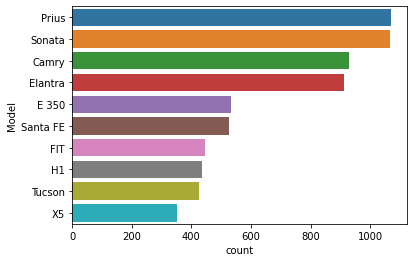

In [36]:
sns.countplot(y ='Model',data = data,order=data.Model.value_counts().iloc[:10].index )
plt.show()

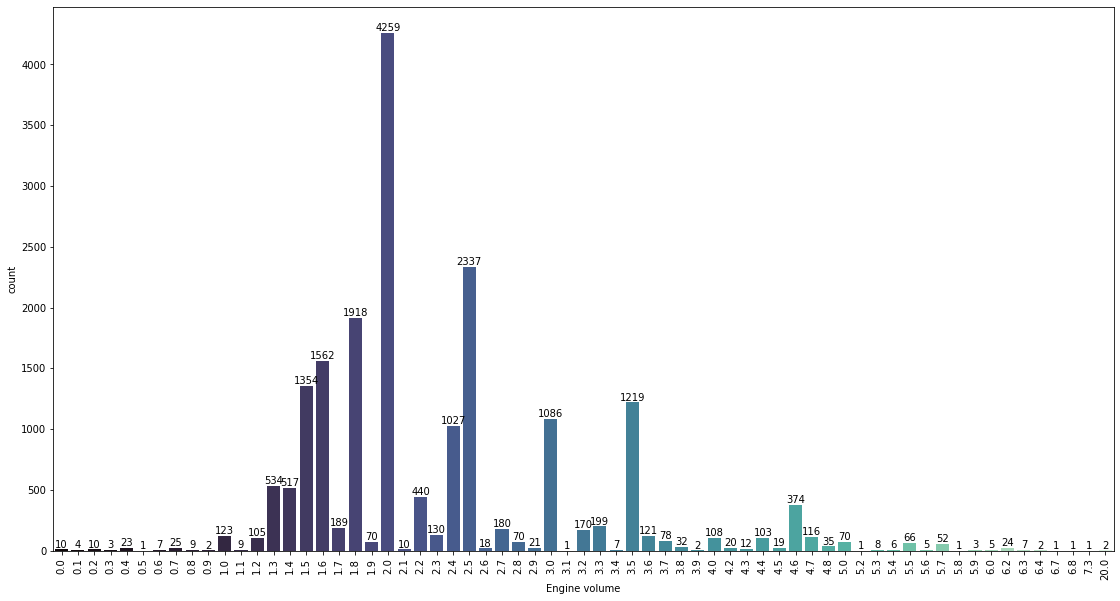

In [37]:
plt.figure(figsize=(19,10))
c1=sns.countplot(x='Engine volume',data=data,palette="mako")
plt.xticks(rotation=90)
c1.bar_label(c1.containers[0],size = 10)
plt.show()

In [38]:
fig = px.line(data, x='Price')
fig.show()

**Появляется большие выбросы в цене. Удалим самые большие выбросы чтобы лучше изучать данные**

In [39]:
data['Price'] = data['Price'].replace([627220, 872946,26307500], data['Price'].median())

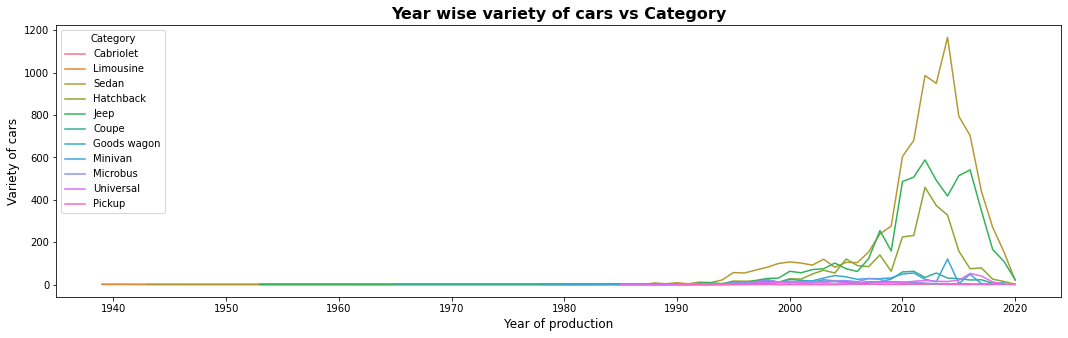

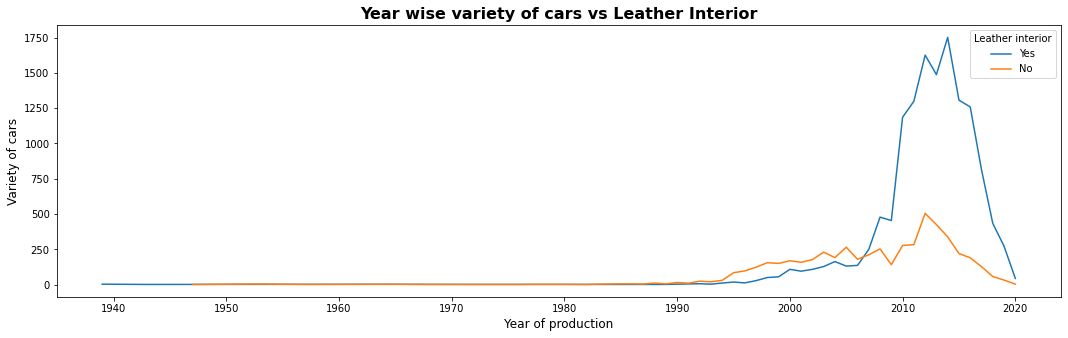

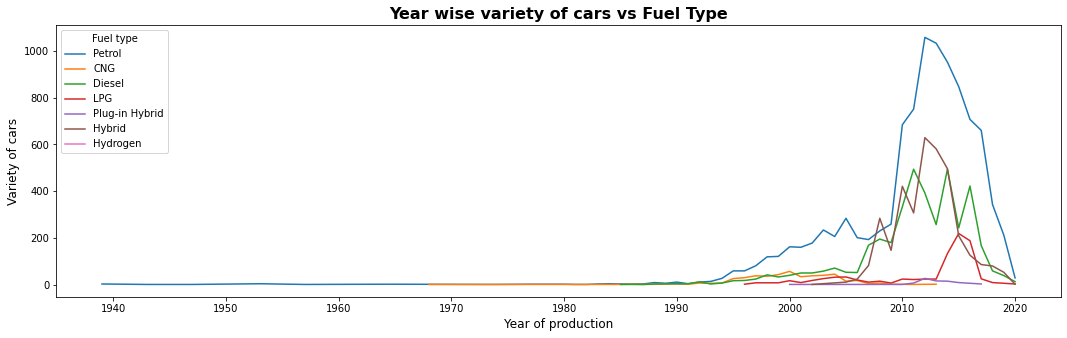

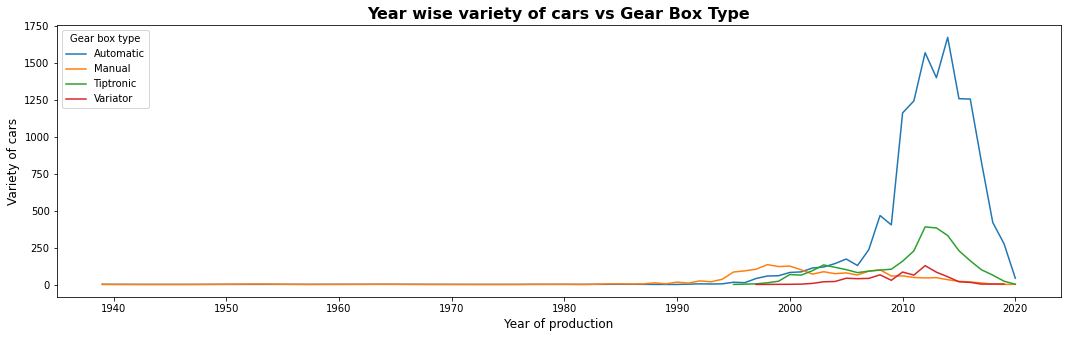

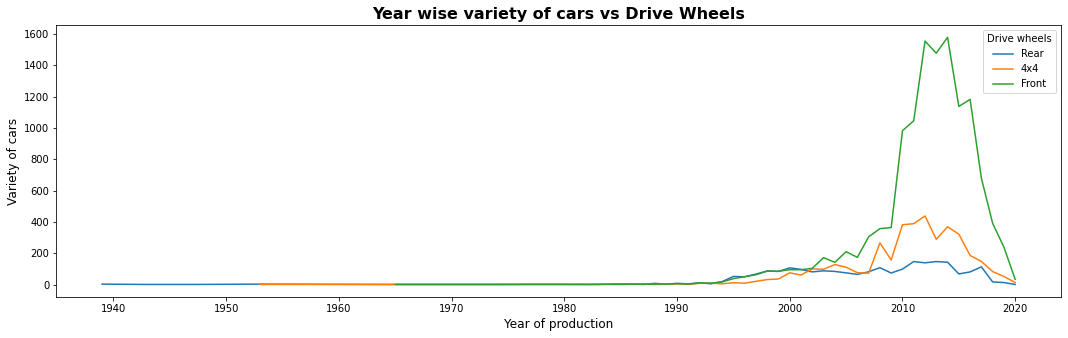

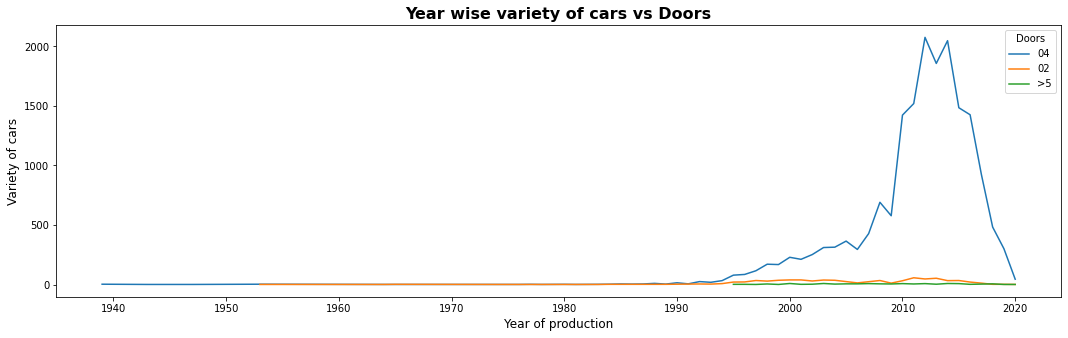

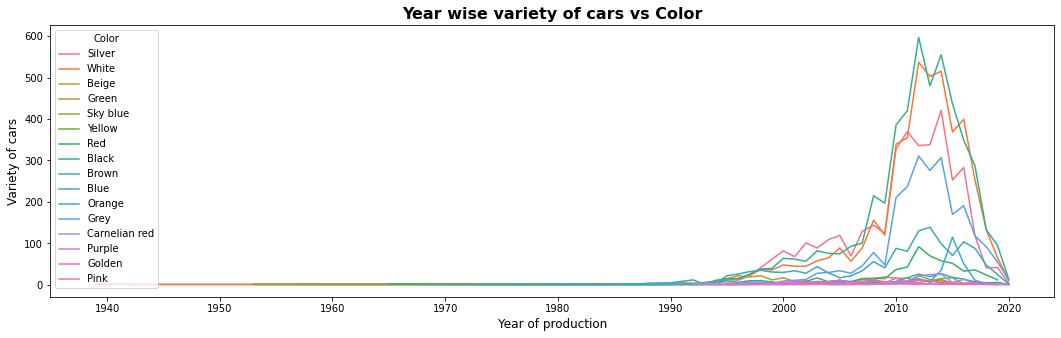

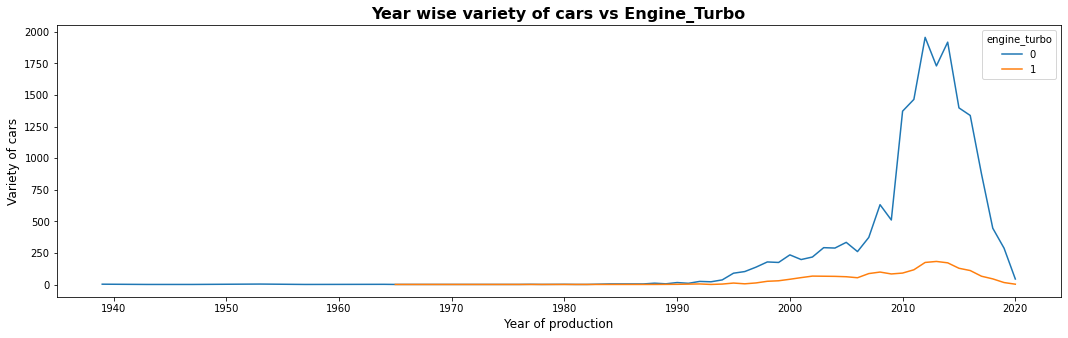

In [40]:
cat_col  = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Color', 'engine_turbo']
for hue in cat_col:
    plt.figure(figsize=(18,5))
    df1 = data[['Prod. year',hue, 'Price']].groupby(by= ['Prod. year',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1, hue = hue)
    plt.title(f'Year wise variety of cars vs {hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Variety of cars', fontsize=12)
    plt.show()

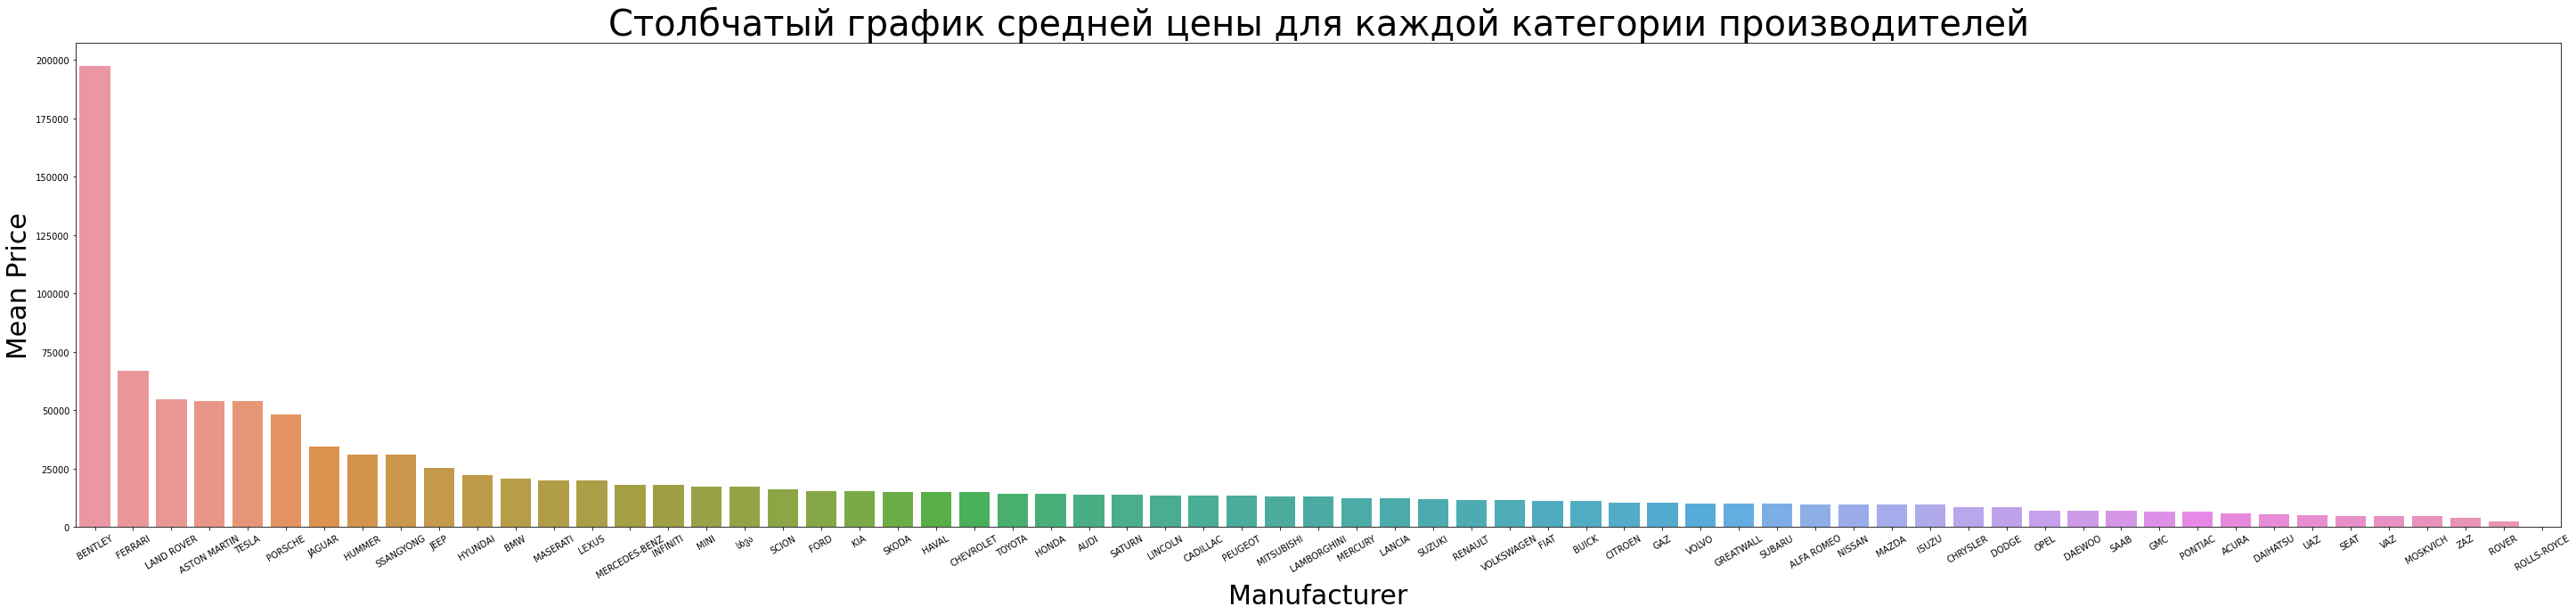

In [42]:
df1 = data[['Price', 'Manufacturer']].groupby(by= ['Manufacturer'], as_index=False).agg('mean').sort_values(by='Price', ascending=False)

# Lets barplot for each categorical columns
plt.figure(figsize=(50,10))

plot = sns.barplot(x="Manufacturer", y="Price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Столбчатый график средней цены для каждой категории производителей', fontsize=40)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)


plt.show()

<AxesSubplot:xlabel='Doors', ylabel='count'>

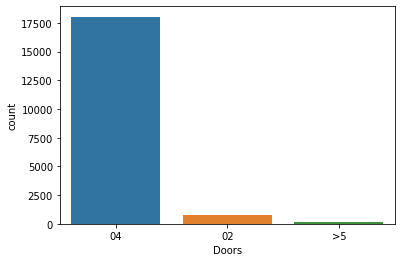

In [43]:
sns.countplot(data=data,  x= 'Doors')

<AxesSubplot:>

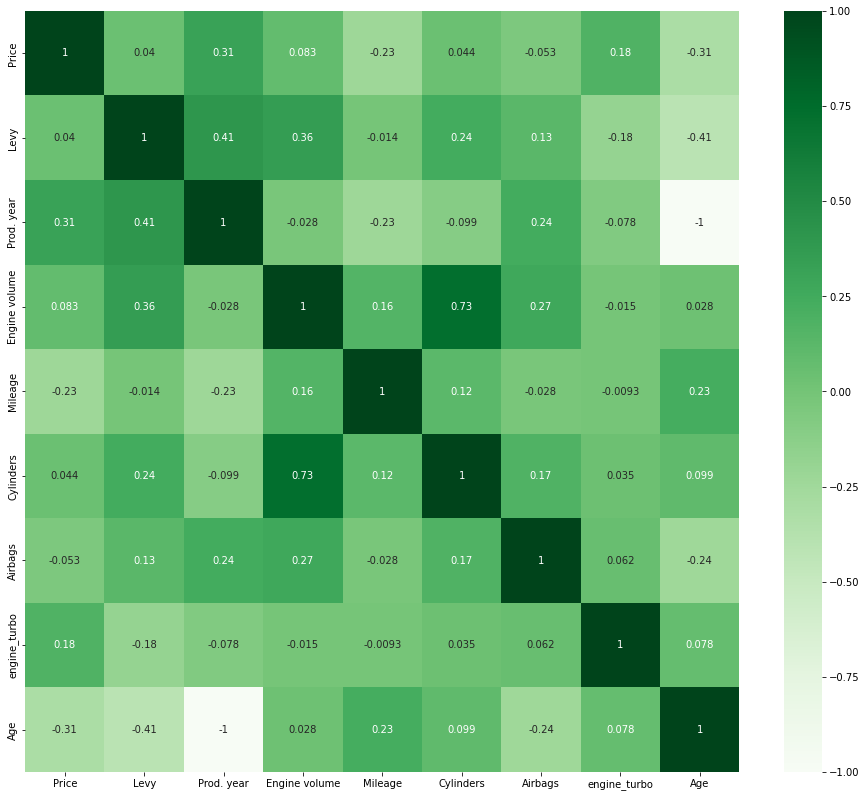

In [70]:
plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Greens')

In [46]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [47]:
for i in cat_cols:
        boxp = px.box(data_frame=data,x=i,y='Price')
        boxp.show()

<AxesSubplot:xlabel='Prod. year'>

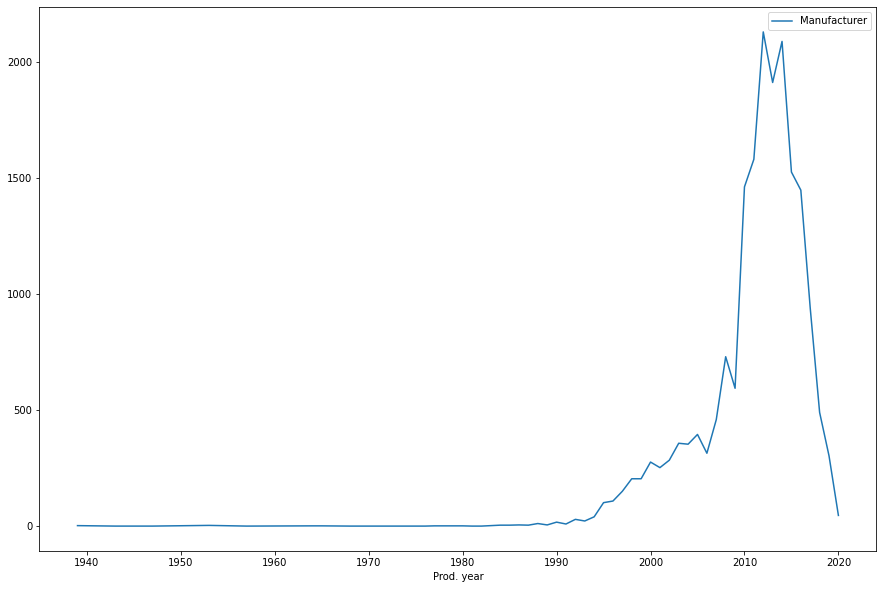

In [48]:
time_added2 = data.groupby("Prod. year")[["Manufacturer"]].count()
time_added2.plot(figsize=(15,10))

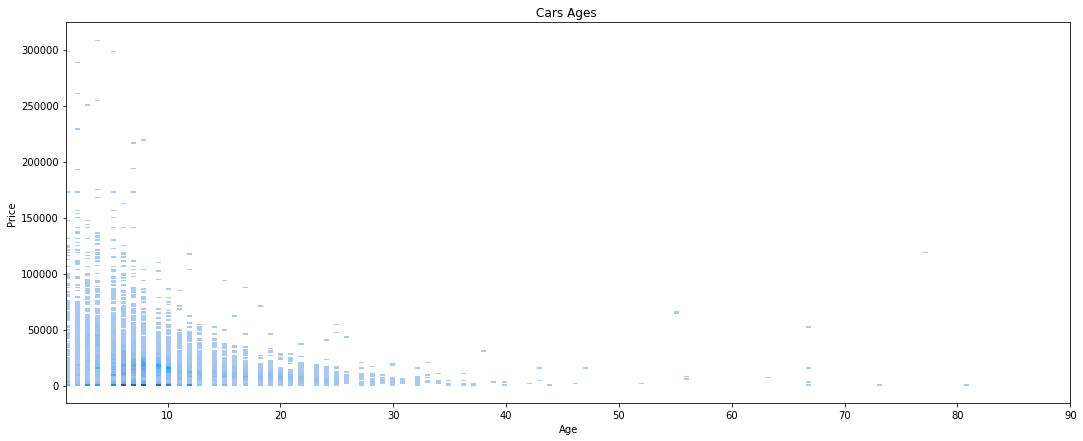

In [49]:
data['Age'] = 2020 - data['Prod. year']
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=data, x="Age",y='Price')
ax.set_xlim(1,90)
plt.title('Cars Ages ')
plt.show()

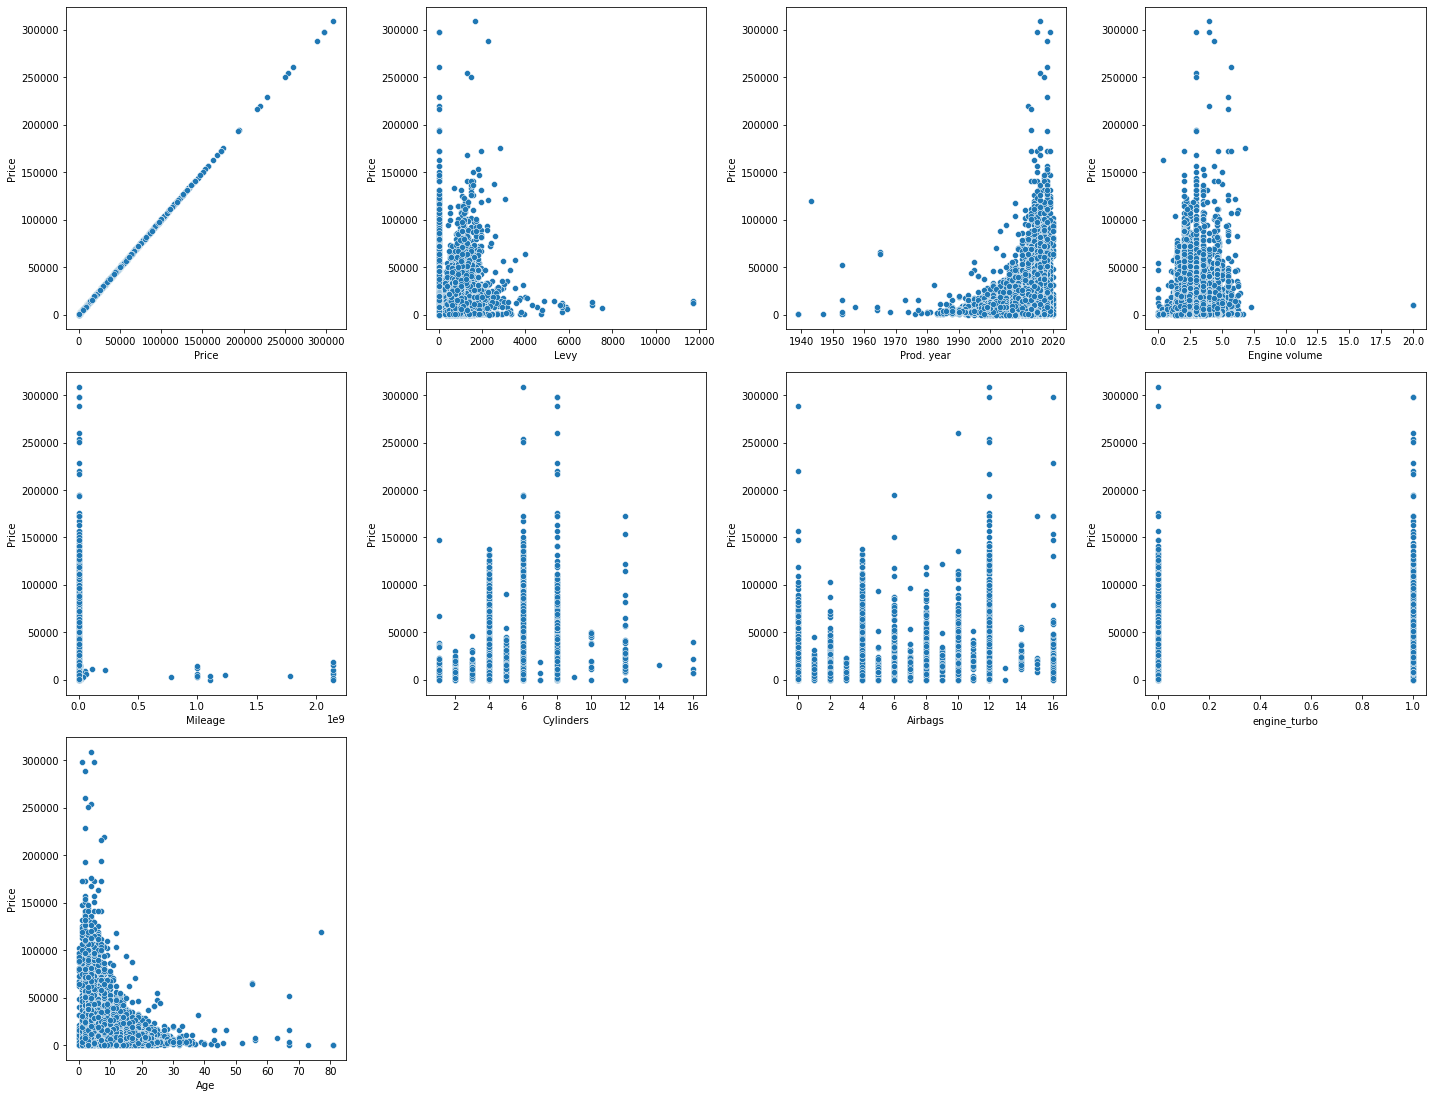

In [50]:
cols = 4
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.scatterplot(x = data[col], ax = ax,y=data['Price'])
    
fig.tight_layout()  
plt.show()

**Выбросы**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:

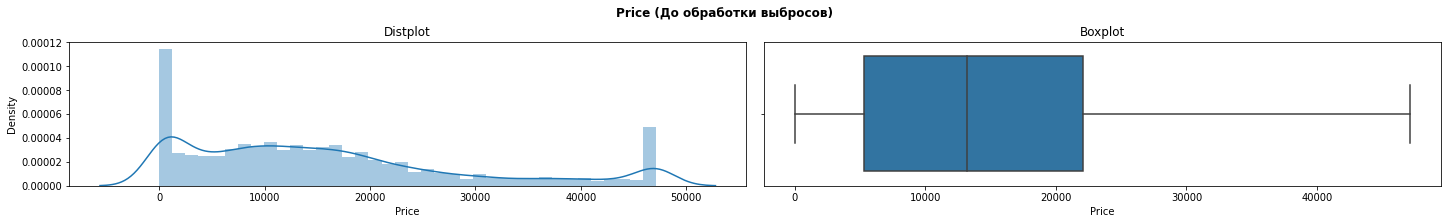

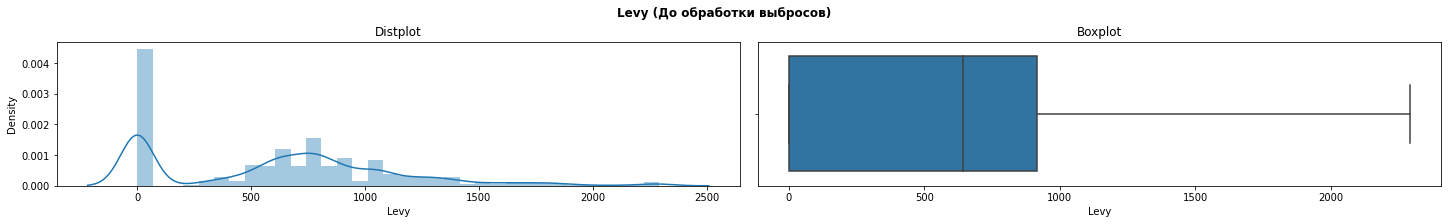

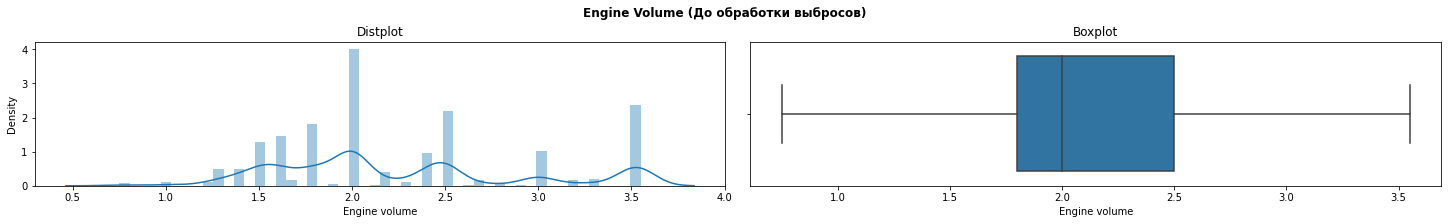

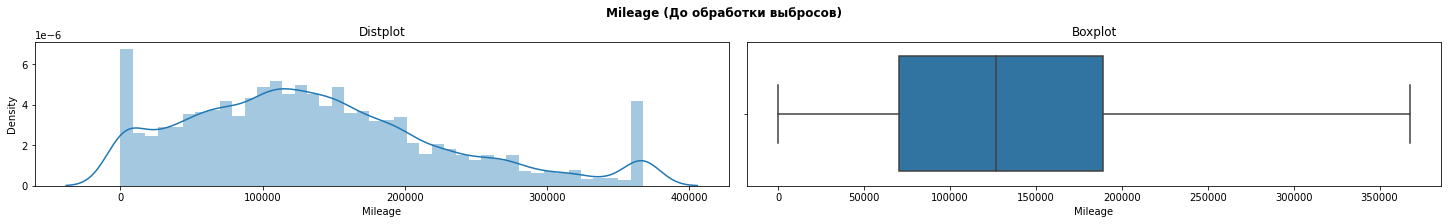

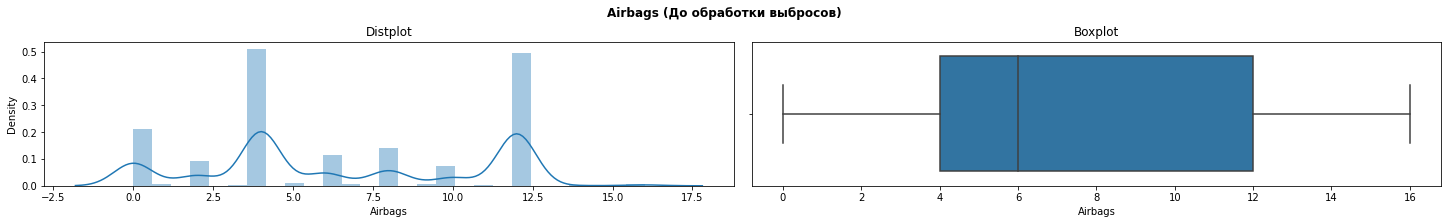

In [74]:
cont_col = ['Price', 'Levy',  'Engine volume', 'Mileage', 'Airbags']

for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (До обработки выбросов)',weight='bold')
    fig.show()

In [52]:
data[cont_col].describe()

Price          Levy  Engine volume       Mileage       Airbags
count   18924.000000  18924.000000   18924.000000  1.892400e+04  18924.000000
mean    17120.084285    632.886493       2.306251  1.555373e+06      6.568379
std     18268.647528    568.273736       0.877591  4.880221e+07      4.322323
min         1.000000      0.000000       0.000000  0.000000e+00      0.000000
25%      5331.000000      0.000000       1.800000  7.019575e+04      4.000000
50%     13172.000000    642.000000       2.000000  1.264000e+05      6.000000
75%     22063.000000    917.000000       2.500000  1.891198e+05     12.000000
max    308906.000000  11714.000000      20.000000  2.147484e+09     16.000000

In [53]:
data['Price'].describe()

count     18924.000000
mean      17120.084285
std       18268.647528
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22063.000000
max      308906.000000
Name: Price, dtype: float64

In [55]:
def outlier_prcnt(data, col_list):
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((data[col_name] > fence_high) | (data[col_name] < fence_low)).sum()
        total = data[col_name].shape[0]
        print(f"Общие выбросы в {col_name}: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(data, cont_col)

Общие выбросы в Price: 1052 - 5.56%.
Общие выбросы в Levy: 160 - 0.85%.
Общие выбросы в Engine volume: 1358 - 7.18%.
Общие выбросы в Mileage: 635 - 3.36%.
Общие выбросы в Airbags: 0 - 0.0%.


## Метод IQR

In [56]:
def outlier_handle(data, col_list):
    df_new = data.copy()
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Ограничение выбросов с использованием метода IQR.
        df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df_new
# Давайте получим количество выбросов в каждом числовом столбце.
data = outlier_handle(data, cont_col)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:

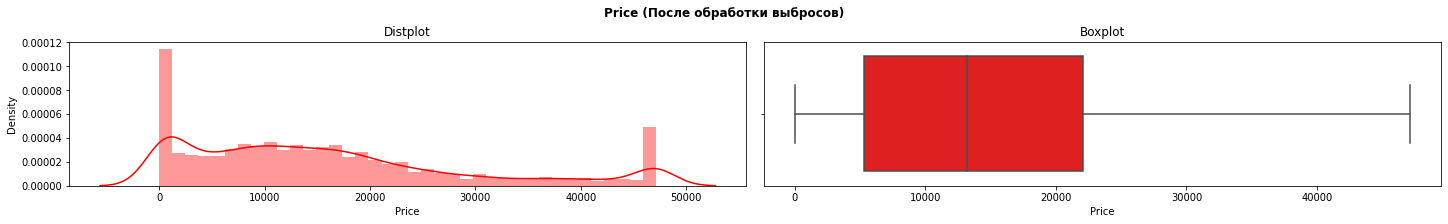

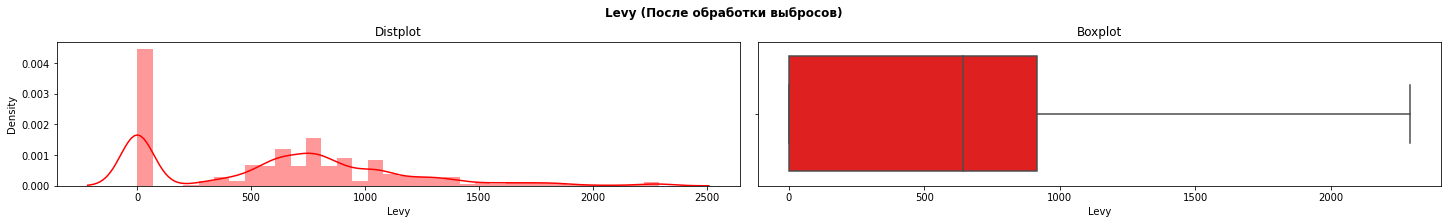

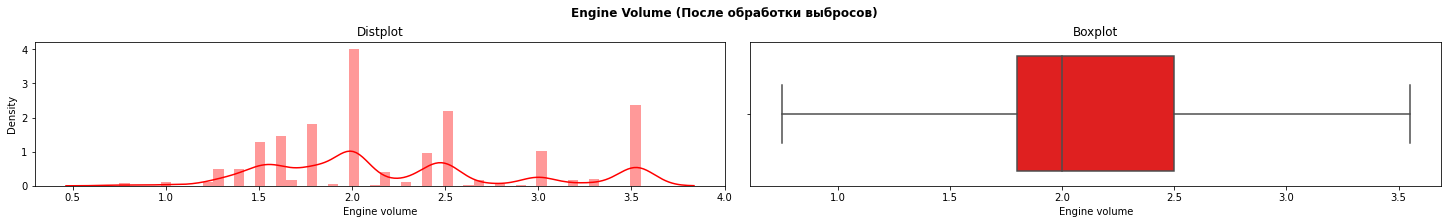

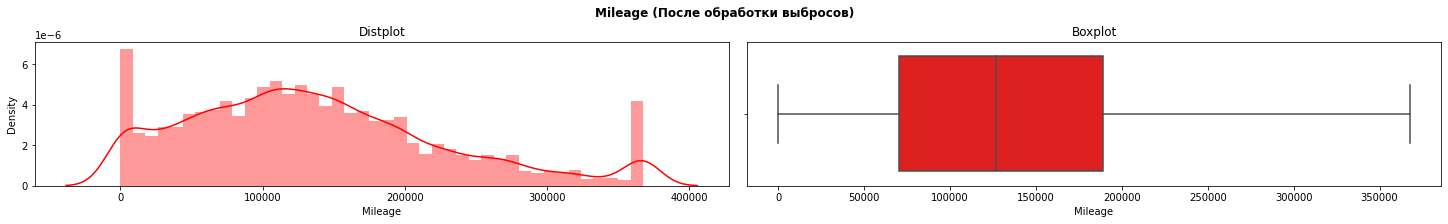

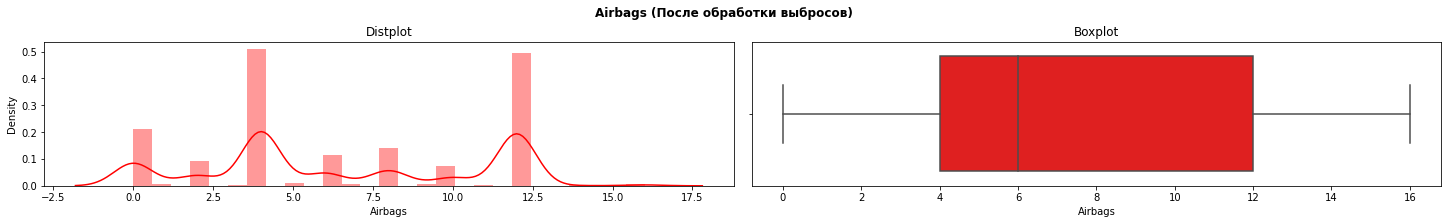

In [73]:
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (После обработки выбросов)',weight='bold')
    fig.show()

In [59]:
data[cont_col].describe()

Price          Levy  Engine volume        Mileage       Airbags
count  18924.000000  18924.000000   18924.000000   18924.000000  18924.000000
mean   15881.171423    625.483249       2.238766  137503.106862      6.568379
std    13415.105900    520.625821       0.682590   90883.265208      4.322323
min        1.000000      0.000000       0.750000       0.000000      0.000000
25%     5331.000000      0.000000       1.800000   70195.750000      4.000000
50%    13172.000000    642.000000       2.000000  126400.000000      6.000000
75%    22063.000000    917.000000       2.500000  189119.750000     12.000000
max    47161.000000   2292.500000       3.550000  367505.750000     16.000000

In [61]:
data['Price'].describe()

count    18924.000000
mean     15881.171423
std      13415.105900
min          1.000000
25%       5331.000000
50%      13172.000000
75%      22063.000000
max      47161.000000
Name: Price, dtype: float64

## Дополнительный анализ данных, для того чтобы узнать наиболее влиятельную характеристику на среднюю цену.

### Тип кузова

In [63]:
category_count = data['Category'].value_counts(dropna = False)
category_count

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



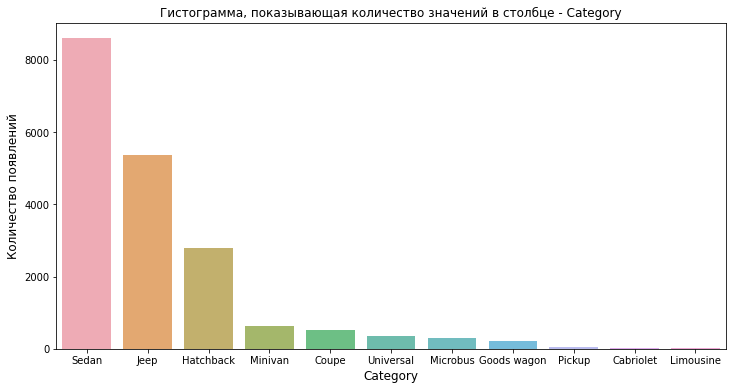

In [78]:
plt.figure(figsize = (12, 6))
sns.barplot(category_count.index, category_count.values, alpha = 0.8)
plt.title('Гистограмма, показывающая количество значений в столбце - Category')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

In [65]:
mean_price_category = data[['Category', 'Price']].groupby('Category', as_index = False).mean()
mean_price_category

Category         Price
0     Cabriolet  21144.428571
1         Coupe  17753.765152
2   Goods wagon   9771.729258
3     Hatchback  11274.222937
4          Jeep  20925.029937
5     Limousine  11534.454545
6      Microbus  17814.949833
7       Minivan  20123.282780
8        Pickup  23397.686275
9         Sedan  13570.386628
10    Universal  22166.105263

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



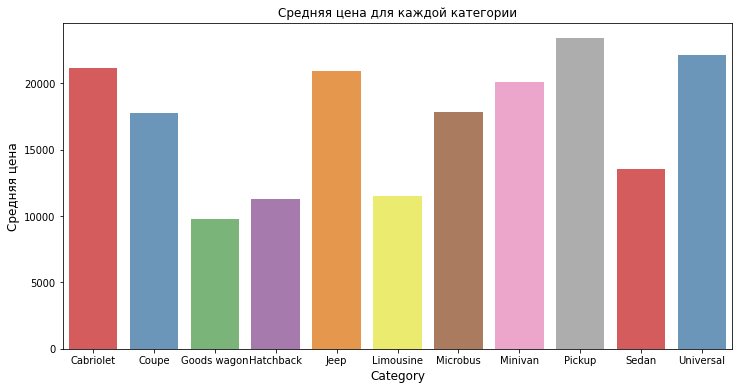

In [79]:
plt.figure(figsize = (12, 6))
sns.barplot(mean_price_category['Category'], mean_price_category['Price'], alpha = 0.8,palette='Set1')
plt.title('Средняя цена для каждой категории')
plt.ylabel('Средняя цена', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

### Кожанный салон

In [71]:
interior_count=data['Leather interior'].value_counts()
interior_count

Yes    13731
No      5193
Name: Leather interior, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



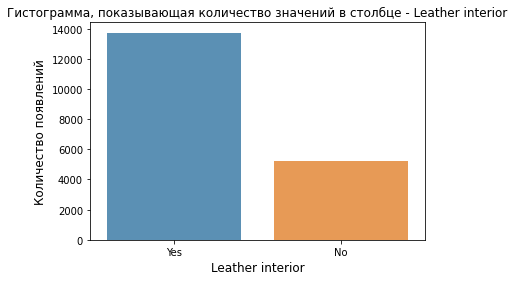

In [80]:
sns.barplot(interior_count.index, interior_count.values, alpha = 0.8)
plt.title('Гистограмма, показывающая количество значений в столбце - Leather interior')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

### Тип топлива

In [75]:
fuel_count = data['Fuel type'].value_counts(dropna = False)
fuel_count

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



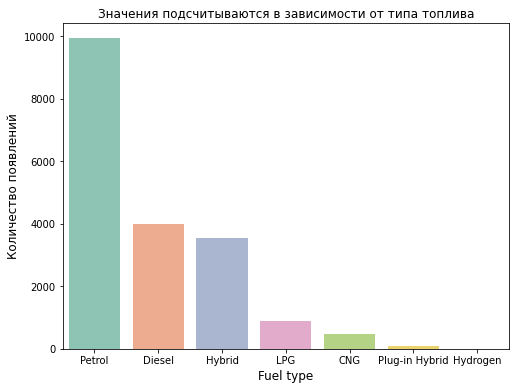

In [82]:
plt.figure(figsize = (8, 6))
sns.barplot(fuel_count.index, fuel_count.values, alpha = 0.8,palette='Set2')
plt.title('Значения подсчитываются в зависимости от типа топлива')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



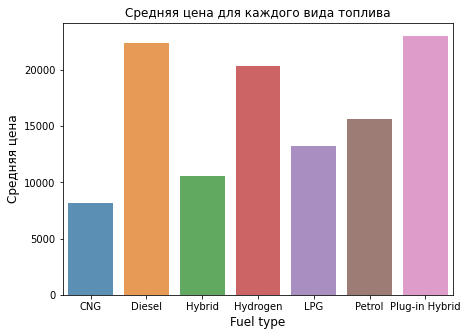

In [84]:
mean_price_fuel = data[['Fuel type', 'Price']].groupby('Fuel type', as_index = False).mean()
plt.figure(figsize = (7, 5))
sns.barplot(mean_price_fuel['Fuel type'], mean_price_fuel['Price'], alpha = 0.8)
plt.title('Средняя цена для каждого вида топлива')
plt.ylabel('Средняя цена', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

### Тип коробки передач

In [85]:
gear_count = data['Gear box type'].value_counts(dropna = False)
gear_count

Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: Gear box type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



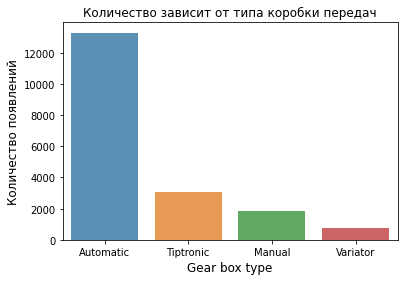

In [88]:
sns.barplot(gear_count.index, gear_count.values, alpha = 0.8)
plt.title('Количество зависит от типа коробки передач')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

  Gear box type         Price
0     Automatic  15096.098479
1        Manual  11244.390998
2     Tiptronic  22388.666232
3      Variator  14560.694407


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



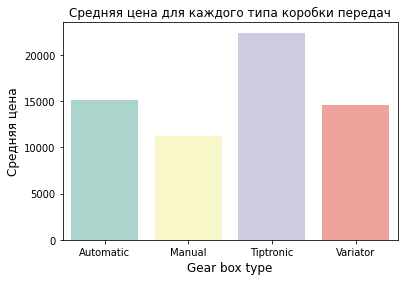

In [90]:
mean_price_gear = data[['Gear box type', 'Price']].groupby('Gear box type', as_index = False).mean()
print(mean_price_gear)
sns.barplot(mean_price_gear['Gear box type'], mean_price_gear['Price'], alpha = 0.8,palette='Set3')
plt.title('Средняя цена для каждого типа коробки передач')
plt.ylabel('Средняя цена', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

### Привод

In [92]:
drive_count = data['Drive wheels'].value_counts(dropna = False)
drive_count

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



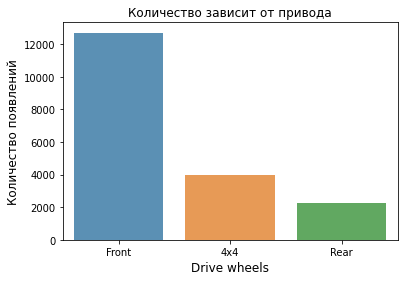

In [94]:
sns.barplot(drive_count.index, drive_count.values, alpha = 0.8)
plt.title('Количество зависит от привода')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

  Drive wheels         Price
0          4x4  16175.091711
1        Front  15840.380859
2         Rear  15594.121239


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



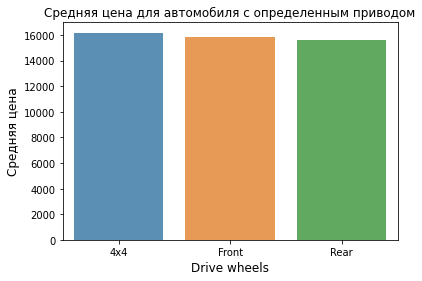

In [96]:
mean_price_drive = data[['Drive wheels', 'Price']].groupby('Drive wheels', as_index = False).mean()
print(mean_price_drive)
sns.barplot(mean_price_drive['Drive wheels'], mean_price_drive['Price'], alpha = 0.8)
plt.title('Средняя цена для автомобиля с определенным приводом')
plt.ylabel('Средняя цена', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

### Цвет

In [97]:
color_count = data['Color'].value_counts(dropna = False)
color_count

Black            4944
White            4407
Silver           3729
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: Color, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



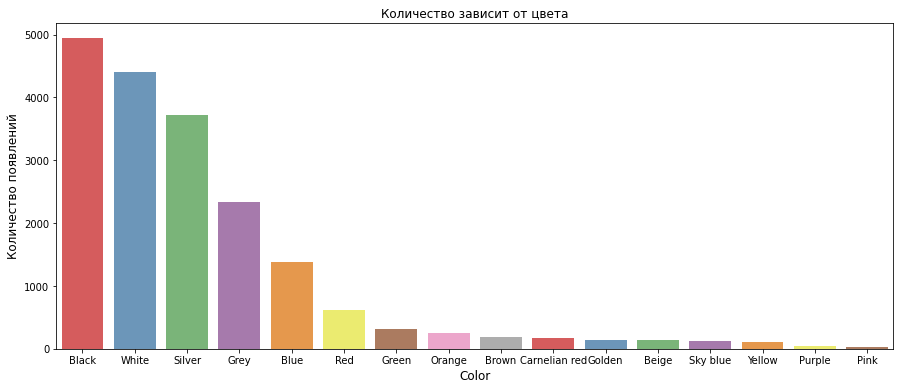

In [98]:
plt.figure(figsize = (15, 6))
sns.barplot(color_count.index, color_count.values, alpha = 0.8,palette="Set1")
plt.title('Количество зависит от цвета')
plt.ylabel('Количество появлений', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

            Color         Price
0           Beige  15282.402985
1           Black  16674.445995
2            Blue  14214.250000
3           Brown  17898.827027
4   Carnelian red  15348.146893
5          Golden  14328.384615
6           Green   9261.897196
7            Grey  17790.931285
8          Orange  12154.178571
9            Pink  10377.320000
10         Purple   8837.384615
11            Red  13240.823151
12         Silver  14707.495307
13       Sky blue  14036.278689
14          White  16637.349671
15         Yellow  18817.904762


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



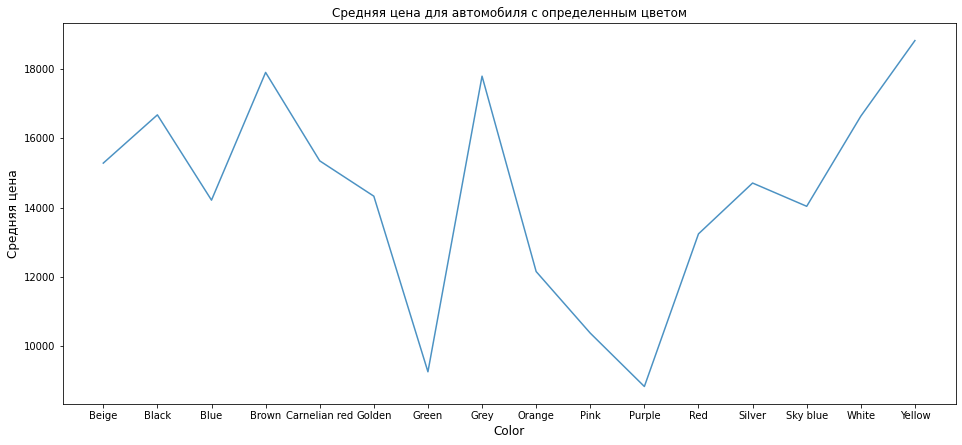

In [101]:
mean_price_color = data[['Color', 'Price']].groupby('Color', as_index = False).mean()
print(mean_price_color)
plt.figure(figsize = (16, 7))
sns.lineplot(mean_price_color['Color'], mean_price_color['Price'], alpha = 0.8)
plt.title('Средняя цена для автомобиля с определенным цветом')
plt.ylabel('Средняя цена', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

## Кодирование

In [102]:
from sklearn.preprocessing import LabelEncoder
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  float64
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  float6

In [103]:
Manufacturer_le = LabelEncoder()
Model_le = LabelEncoder()
Category_le = LabelEncoder()
Leather_interior_le = LabelEncoder()
Fuel_type_le = LabelEncoder()
Gear_box_type_le = LabelEncoder()
Doors_le  = LabelEncoder()
Wheel_le  = LabelEncoder() 
Drive_wheels_le = LabelEncoder() 
color_le = LabelEncoder()               

In [104]:
data['Manufacturer'] = Manufacturer_le.fit_transform(data['Manufacturer'])
data['Model'] = Model_le.fit_transform(data['Model'])
data['Category'] = Category_le.fit_transform(data['Category'])
data['Leather interior'] = Leather_interior_le.fit_transform(data['Leather interior'])
data['Fuel type'] = Fuel_type_le.fit_transform(data['Fuel type'])
data['Gear box type'] = Gear_box_type_le.fit_transform(data['Gear box type'])
data['Doors'] = Doors_le.fit_transform(data['Doors'])
data['Wheel'] = Wheel_le.fit_transform(data['Wheel'])
data['Drive wheels'] = Drive_wheels_le.fit_transform(data['Drive wheels'])
data['Color'] = color_le.fit_transform(data['Color'])

In [105]:
data

Price    Levy  Manufacturer  Model  Prod. year  Category  \
0      13328.0  1399.0            32   1242        2010         4   
1      16621.0  1018.0             8    658        2011         4   
2       8467.0     0.0            21    684        2006         3   
3       3607.0   862.0            16    661        2011         4   
4      11726.0   446.0            21    684        2014         3   
...        ...     ...           ...    ...         ...       ...   
19232   8467.0     0.0            36    385        1999         1   
19233  15681.0   831.0            23   1334        2011         9   
19234  26108.0   836.0            23   1442        2010         4   
19235   5331.0  1288.0             8    456        2007         4   
19236    470.0   753.0            23   1334        2012         9   

       Leather interior  Fuel type  Engine volume   Mileage  Cylinders  \
0                     1          2            3.5  186005.0        6.0   
1                     0          5            3.0  192000.0        6.0   
2                     0          5            1.3  200000.0        4.0   
3                     1          2            2.5  168966.0        4.0   
4                     1          5            1.3   91901.0        4.0   
...                 ...        ...            ...       ...        ...   
19232                 1          0            2.0  300000.0        4.0   
19233                 1          5            2.4  161600.0        4.0   
19234                 1          1            2.0  116365.0        4.0   
19235                 1          1            2.0   51258.0        4.0   
19236                 1          2            2.4  186923.0        4.0   

       Gear box type  Drive wheels  Doors  Wheel  Color  Airbags  \
0                  0             0      1      0     12     12.0   
1                  2             0      1      0      1      8.0   
2                  3             1      1      1      1      2.0   
3                  0             0      1      0     14      0.0   
4                  0             1      1      0     12      4.0   
...              ...           ...    ...    ...    ...      ...   
19232              1             2      0      0     12      5.0   
19233              2             1      1      0     11      8.0   
19234              0             1      1      0      7      4.0   
19235              0             1      1      0      1      4.0   
19236              0             1      1      0     14     12.0   

       engine_turbo  Age  
0                 0   10  
1                 0    9  
2                 0   14  
3                 0    9  
4                 0    6  
...             ...  ...  
19232             1   21  
19233             0    9  
19234             0   10  
19235             0   13  
19236             0    8  

[18924 rows x 19 columns]

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  float64
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  int64  
 3   Model             18924 non-null  int64  
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  int64  
 6   Leather interior  18924 non-null  int64  
 7   Fuel type         18924 non-null  int64  
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  int64  
 12  Drive wheels      18924 non-null  int64  
 13  Doors             18924 non-null  int64  
 14  Wheel             18924 non-null  int64  
 15  Color             18924 non-null  int64  
 16  Airbags           18924 non-null  float6

## Моделирование

**Разделим данные на обучающие и тестовые**

In [109]:
X = data.drop('Price',axis=1).values
Y = data['Price'].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

##### Масштабируем данные с помощью MinMaxScaler

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [115]:
x_train.shape

(14193, 18)

In [116]:
y_train.shape

(14193,)

In [117]:
y_test.shape

(4731,)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [120]:
linear_regressor.score(x_train,y_train)

0.28725649942068776

In [121]:
linear_regressor.score(x_test,y_test)

0.2534901482530635

**Очень плохая точность**

In [122]:
y_pred = linear_regressor.predict(x_test)

In [124]:
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head(10)

y_test   y_pred
0  11604.0  15585.0
1    470.0   8791.0
2  20162.0  20722.0
3   7527.0  -1579.0
4  18817.0  20542.0
5  44003.0  22378.0
6  21326.0  19641.0
7  15681.0  18527.0
8   6899.0   1079.0
9   1333.0  21383.0

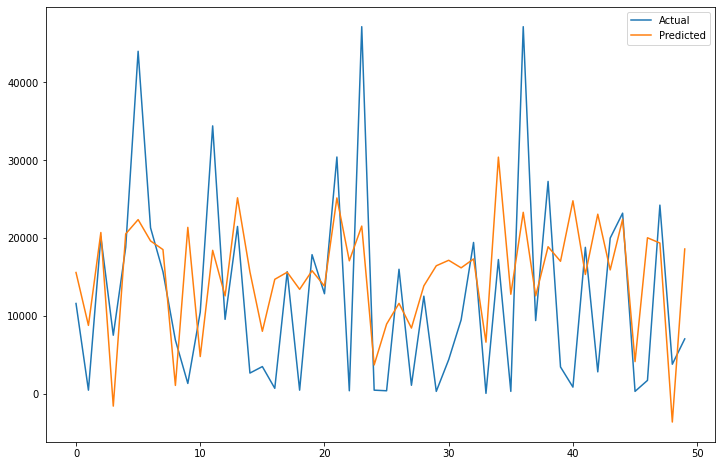

In [125]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [126]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 8910.268
Mean Squared Error of the model is : 134569796.922
Root Mean Squared Error of the model is : 11600.422
R-squared value of the model is : 0.253


### Теперь попробуем Случайный лес

In [127]:
from sklearn.ensemble  import RandomForestRegressor

In [128]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(x_train, y_train)
print(random_forest_regressor.score(x_train , y_train))
print(random_forest_regressor.score(x_test , y_test))

0.9596881494950898
0.7935825659461946


In [129]:
y_pred = random_forest_regressor.predict(x_test)

In [130]:
RF = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [131]:
RF.head(10)

y_test    y_pred
0  11604.0  16859.29
1    470.0    839.42
2  20162.0  26353.51
3   7527.0   6685.89
4  18817.0  10383.84
5  44003.0  42340.07
6  21326.0  13750.95
7  15681.0  15468.14
8   6899.0   6807.96
9   1333.0   2067.89

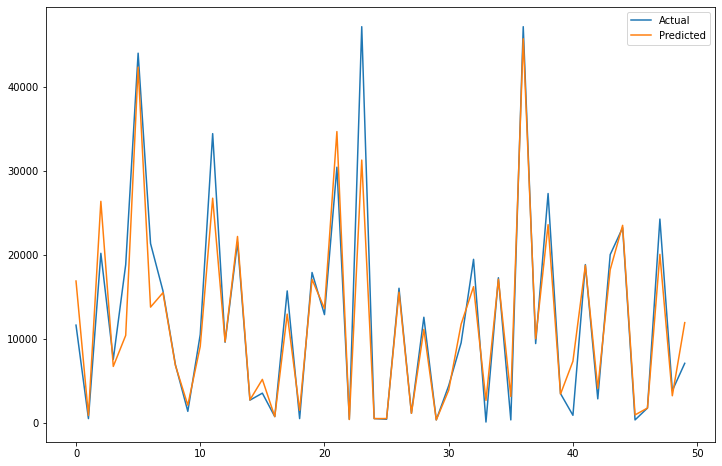

In [132]:
plt.figure(figsize=(12,8))
plt.plot(RF[:50])
plt.legend(['Actual' , 'Predicted'])

In [133]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 3533.239
Mean Squared Error of the model is : 37209893.636
Root Mean Squared Error of the model is : 6099.991
R-squared value of the model is : 0.794


### Используем Gradient Boost

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.3)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, n_estimators=500)

In [135]:
gbr.score(x_train,y_train)

0.8456715443943302

In [136]:
gbr.score(x_test,y_test)

0.7527989143026586

In [138]:
y_pred = gbr.predict(x_test)
y_pred = gbr.predict(x_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head(10)

y_test        y_pred
0  11604.0  14691.043567
1    470.0  -2280.709908
2  20162.0  27035.845257
3   7527.0  12238.666383
4  18817.0  12647.121016
5  44003.0  44613.366835
6  21326.0  15857.607385
7  15681.0  12443.143566
8   6899.0   3166.317199
9   1333.0   5855.864300

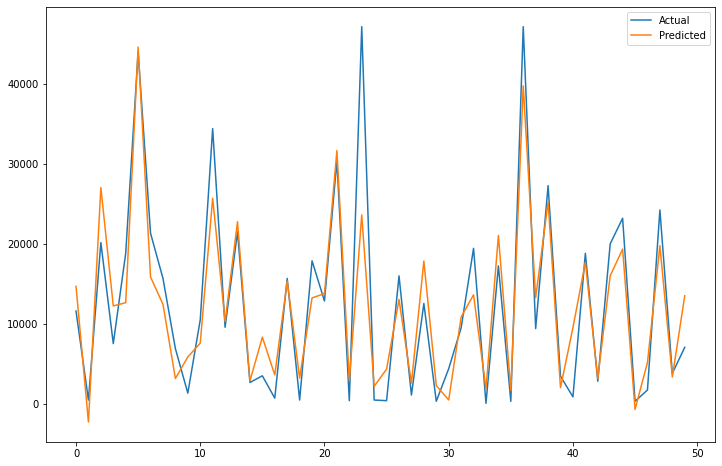

In [139]:
plt.figure(figsize=(12,8))
plt.plot(gbx[:50])
plt.legend(['Actual' , 'Predicted'])

In [140]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4456.399
Mean Squared Error of the model is : 44561769.444
Root Mean Squared Error of the model is : 6675.46
R-squared value of the model is : 0.753


### Используем XGBoost

In [141]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=7,n_estimators = 415,learning_rate=0.02220235)
xg.fit(x_train, y_train)

[18:59:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02220235, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=415, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [142]:
xg.score(x_train,y_train)
xg.score(x_test,y_test)

0.7642793756619962

In [143]:
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx.head(10)

y_test        y_pred
0  11604.0  14658.412109
1    470.0   1195.878540
2  20162.0  26222.832031
3   7527.0   6684.765625
4  18817.0  11222.333984
5  44003.0  43079.472656
6  21326.0  13005.508789
7  15681.0  14630.270508
8   6899.0   5631.061523
9   1333.0   4532.124023

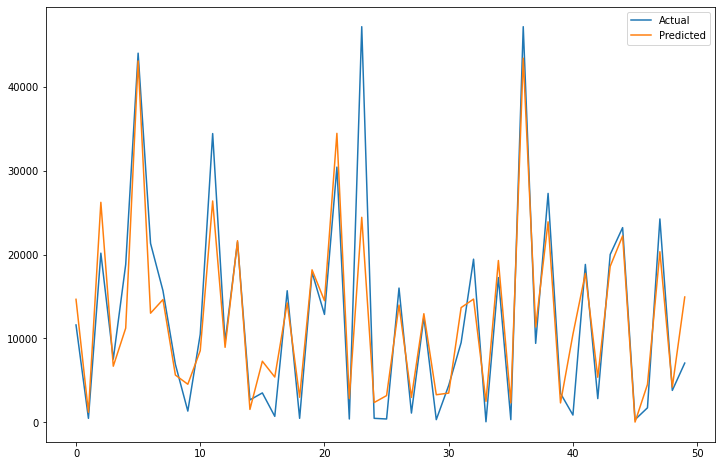

In [144]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [145]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4266.969
Mean Squared Error of the model is : 42492241.024
Root Mean Squared Error of the model is : 6518.607
R-squared value of the model is : 0.764


## Выводы

Лучшей моделью оказалась модель Random Forest.